<a href="https://colab.research.google.com/github/SebasMore07/SistemasDyC/blob/main/Talleres/Taller_6_Grupo_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 6

# Integrantes: Esteban Lizardo Malte Ruano, Sebastián Moreno Rincon.

# **PRIMER PUNTO CON:   K=10**

Función de transferencia:
<TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


       10
-----------------
s^3 + 6 s^2 + 5 s


--- Análisis de Estabilidad Relativa ---
Frecuencia de cruce de ganancia ω₀ (|G(jω)| = 0 dB): 1.2271 rad/s
Frecuencia de cruce de fase ω₁ (∠G(jω) = −180°): 2.2361 rad/s
Margen de ganancia: 9.54 dB
Margen de fase: 25.39°
✅ Sistema estable


/usr/local/lib/python3.11/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


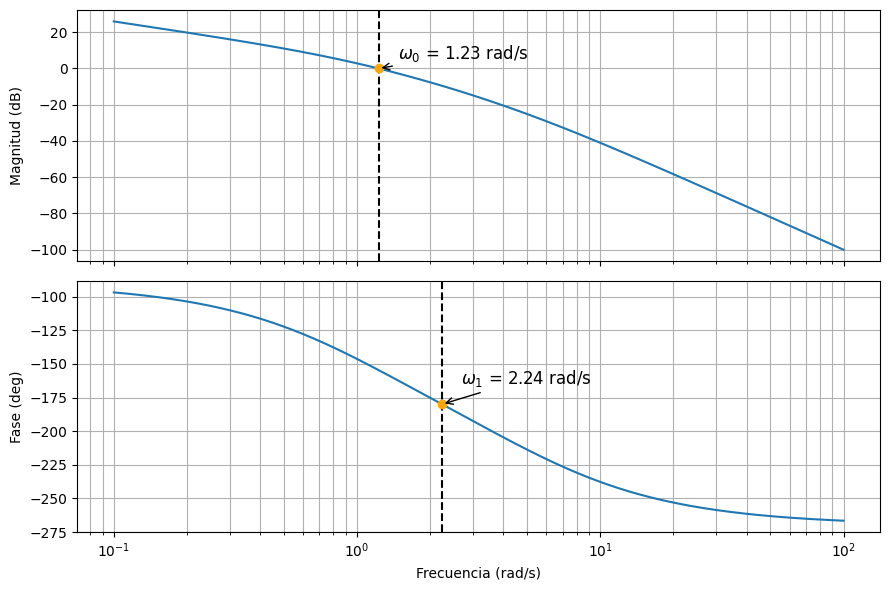

In [ ]:
!pip install control numpy matplotlib
# Respuesta en frecuencia del sistema G(s) = 10 / [s(s+1)(s+5)]
import numpy as n
import matplotlib.pyplot as plt
from control.matlab import *
import control as ct

# Definición del sistema: G(s) = 10 / [s(s+1)(s+5)]
num1 = [10]  # K = 10
den1 = n.polymul([1., 0], n.polymul([1., 1.], [1., 5.]))  # s(s+1)(s+5)
sys1 = tf(num1, den1)
simular = sys1
print("Función de transferencia:")
print(sys1)

# Cálculo de márgenes de estabilidad
gm, pm, wcg, wcp = margin(simular)
mg_db = 20 * n.log10(gm) if gm != float("inf") else float("inf")

# Vector de frecuencias para graficar (logarítmico)
w = n.logspace(-1, 2, 500)  # de 0.1 a 100 rad/s

# Obtener datos de Bode sin graficar
mag, phase, omega = bode(sys1, w, plot=False)

# Crear subplots personalizados
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

# ----- Magnitud -----
ax1.semilogx(omega, 20 * n.log10(mag), label='Magnitud')
ax1.grid(which='both')
ax1.set_ylabel("Magnitud (dB)")

# Línea y anotación en ω₀ (frecuencia cruce de ganancia)
if not n.isnan(wcp):
    ax1.axvline(wcp, linestyle='--', color='k')
    ax1.plot(wcp, 0, 'o', color='orange')
    ax1.annotate(
        rf'$\omega_0$ = {wcp:.2f} rad/s',
        xy=(wcp, 0), xytext=(wcp*1.2, 5),
        arrowprops=dict(arrowstyle='->'), fontsize=12
    )

# ----- Fase -----
ax2.semilogx(omega, n.degrees(phase), label='Fase')
ax2.grid(which='both')
ax2.set_ylabel("Fase (deg)")
ax2.set_xlabel("Frecuencia (rad/s)")

# Línea y anotación en ω₁ (frecuencia cruce de fase)
if not n.isnan(wcg):
    phi_at_wcg = n.interp(wcg, omega, n.degrees(phase))
    ax2.axvline(wcg, linestyle='--', color='k')
    ax2.plot(wcg, phi_at_wcg, 'o', color='orange')
    ax2.annotate(
        rf'$\omega_1$ = {wcg:.2f} rad/s',
        xy=(wcg, phi_at_wcg), xytext=(wcg*1.2, phi_at_wcg + 15),
        arrowprops=dict(arrowstyle='->'), fontsize=12
    )

# Mostrar resumen en consola
print("\n--- Análisis de Estabilidad Relativa ---")
print(f"Frecuencia de cruce de ganancia ω₀ (|G(jω)| = 0 dB): {wcp:.4f} rad/s")
print(f"Frecuencia de cruce de fase ω₁ (∠G(jω) = −180°): {wcg:.4f} rad/s")
print(f"Margen de ganancia: {mg_db:.2f} dB")
print(f"Margen de fase: {pm:.2f}°")

if mg_db > 0 and pm > 0:
    print("✅ Sistema estable")
else:
    print("❌ Sistema inestable")

plt.tight_layout()
plt.show()


con los valores de **Wo**=1.23 y **W1**=2.24 rad podemos determinar su establidad:
Para el margen de fase determinamos visualmente el corte de W0 (ganacia) con la grafiaca inferior(representa el ángulo de G(jω)) que nos muestra un corte  aproximadamente en -155 grados este lo utlizamos para ver la diferencia y determinar su estabilida


                MF=180+(-155)=25 grados aproximadamente


Asi mismo, para el margen de ganacia determinamos visualmente el corte de W1 (representa el ángulo de G(jω)) con la grafiaca superior(ganancia) que nos muestra un corte  aproximadamente en 10 dB  este lo utlizamos para ver la diferencia y determinar su estabilida


                Mg= 10 dB aproximadamente


con estos valores podemos concluir que el sistema es estable dependiendo de que si MF y Mg son >0, este criterio lo utilizamos para los demas analisis.


# **PRIMER PUNTO CON:   K=100**

Función de transferencia:
<TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


       100
-----------------
s^3 + 6 s^2 + 5 s


--- Análisis de Estabilidad Relativa ---
Frecuencia de cruce de ganancia ω₀ (|G(jω)| = 0 dB): 3.9073 rad/s
Frecuencia de cruce de fase ω₁ (∠G(jω) = −180°): 2.2361 rad/s
Margen de ganancia: -10.46 dB
Margen de fase: -23.65°
❌ Sistema inestable


/usr/local/lib/python3.11/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


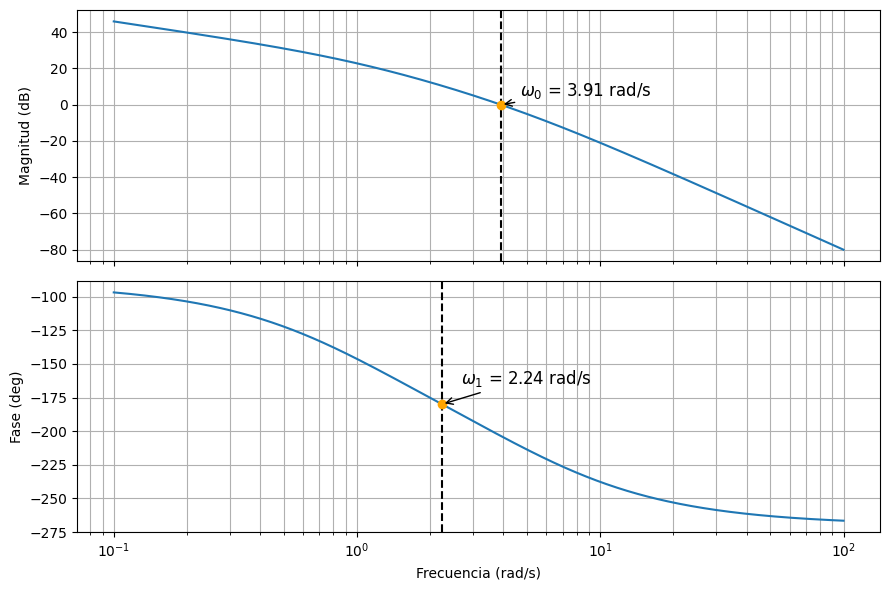

In [ ]:
# RF_EJ1_Anotado_valores_v2.py - Respuesta en frecuencia del sistema G(s) = 10 / [s(s+1)(s+5)]
import numpy as n
import matplotlib.pyplot as plt
from control.matlab import *
import control as ct

# Definición del sistema: G(s) = 100 / [s(s+1)(s+5)]
num1 = [100]  # K = 100
den1 = n.polymul([1., 0], n.polymul([1., 1.], [1., 5.]))  # s(s+1)(s+5)
sys1 = tf(num1, den1)
simular = sys1
print("Función de transferencia:")
print(sys1)

# Cálculo de márgenes de estabilidad
gm, pm, wcg, wcp = margin(simular)
mg_db = 20 * n.log10(gm) if gm != float("inf") else float("inf")

# Vector de frecuencias para graficar (logarítmico)
w = n.logspace(-1, 2, 500)  # de 0.1 a 100 rad/s

# Obtener datos de Bode sin graficar
mag, phase, omega = bode(sys1, w, plot=False)

# Crear subplots personalizados
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

# ----- Magnitud -----
ax1.semilogx(omega, 20 * n.log10(mag), label='Magnitud')
ax1.grid(which='both')
ax1.set_ylabel("Magnitud (dB)")

# Línea y anotación en ω₀ (frecuencia cruce de ganancia)
if not n.isnan(wcp):
    ax1.axvline(wcp, linestyle='--', color='k')
    ax1.plot(wcp, 0, 'o', color='orange')
    ax1.annotate(
        rf'$\omega_0$ = {wcp:.2f} rad/s',
        xy=(wcp, 0), xytext=(wcp*1.2, 5),
        arrowprops=dict(arrowstyle='->'), fontsize=12
    )

# ----- Fase -----
ax2.semilogx(omega, n.degrees(phase), label='Fase')
ax2.grid(which='both')
ax2.set_ylabel("Fase (deg)")
ax2.set_xlabel("Frecuencia (rad/s)")

# Línea y anotación en ω₁ (frecuencia cruce de fase)
if not n.isnan(wcg):
    phi_at_wcg = n.interp(wcg, omega, n.degrees(phase))
    ax2.axvline(wcg, linestyle='--', color='k')
    ax2.plot(wcg, phi_at_wcg, 'o', color='orange')
    ax2.annotate(
        rf'$\omega_1$ = {wcg:.2f} rad/s',
        xy=(wcg, phi_at_wcg), xytext=(wcg*1.2, phi_at_wcg + 15),
        arrowprops=dict(arrowstyle='->'), fontsize=12
    )

# Mostrar resumen en consola
print("\n--- Análisis de Estabilidad Relativa ---")
print(f"Frecuencia de cruce de ganancia ω₀ (|G(jω)| = 0 dB): {wcp:.4f} rad/s")
print(f"Frecuencia de cruce de fase ω₁ (∠G(jω) = −180°): {wcg:.4f} rad/s")
print(f"Margen de ganancia: {mg_db:.2f} dB")
print(f"Margen de fase: {pm:.2f}°")

if mg_db > 0 and pm > 0:
    print("✅ Sistema estable")
else:
    print("❌ Sistema inestable")

plt.tight_layout()
plt.show()


# ¿Que efectos sobre el diagrama de Bode y sobre la estabilidad tiene ese cambio de  ganancia?.

Al aumentar la ganancia 𝐾 de 10 a 100, el diagrama de magnitud se desplaza hacia arriba en 20 dB, mientras que la fase se mantiene igual.

Para 𝐾=10, el sistema tiene un margen de fase cercano a 0° y margen de ganancia positivo, lo que indica estabilidad marginal.

Para 𝐾=100, el sistema presenta margen de fase y margen de ganancia negativos, lo que indica que el sistema se vuelve inestable.

Por lo tanto, aumentar demasiado la ganancia deteriora la estabilidad del sistema.

# **SEGUNDO PUNTO No.a**

/usr/local/lib/python3.11/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(



--- Sistema (a) ---
<TransferFunction>: sys[6]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


         s + 3
-----------------------
s^3 + 4 s^2 + 29 s + 50

Margen de ganancia: inf dB
Margen de fase: inf°
✅ Estable


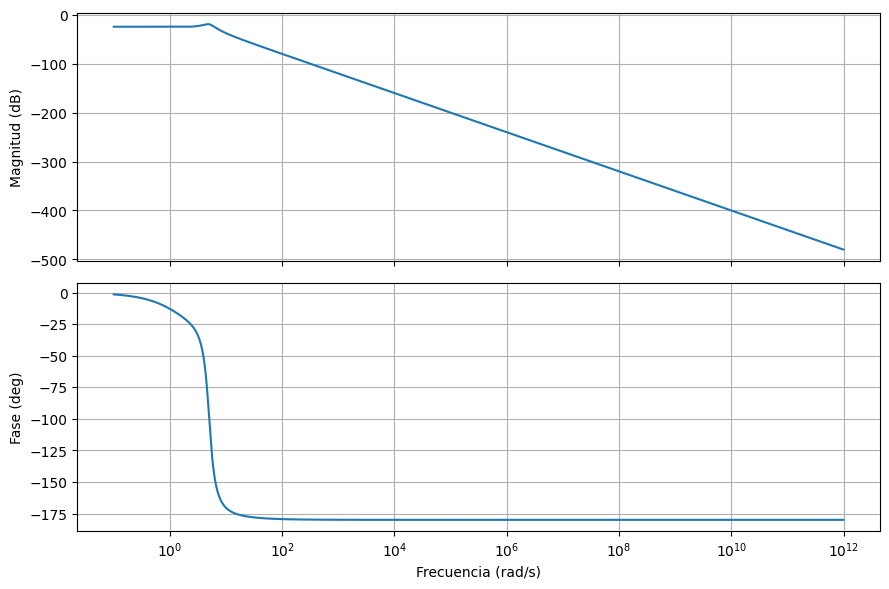

In [ ]:
# G(s) = (s+3) / [(s+2)(s^2 + 2s + 25)]
num = [1, 3]
den = n.polymul([1, 2], [1, 2, 25])
sys = tf(num, den)

# Margen de estabilidad
gm, pm, wcg, wcp = margin(sys)
mg_db = 20 * n.log10(gm) if gm != float("inf") else float("inf")

# Bode
w = n.logspace(-1, 12, 50000)
mag, phase, omega = bode(sys, w, plot=False)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

ax1.semilogx(omega, 20 * n.log10(mag))
ax1.set_ylabel("Magnitud (dB)")
ax1.grid(which='both')
if not n.isnan(wcp):
    ax1.axvline(wcp, color='k', linestyle='--')
    ax1.annotate(f'ω₀ = {wcp:.2f}', xy=(wcp, 0), xytext=(wcp*1.1, 5),
                 arrowprops=dict(arrowstyle='->'))

ax2.semilogx(omega, n.degrees(phase))
ax2.set_ylabel("Fase (deg)")
ax2.set_xlabel("Frecuencia (rad/s)")
ax2.grid(which='both')
if not n.isnan(wcg):
    ph = n.interp(wcg, omega, n.degrees(phase))
    ax2.axvline(wcg, color='k', linestyle='--')
    ax2.annotate(f'ω₁ = {wcg:.2f}', xy=(wcg, ph), xytext=(wcg*1.1, ph + 15),
                 arrowprops=dict(arrowstyle='->'))

print("\n--- Sistema (a) ---")
print(sys)
print(f"Margen de ganancia: {mg_db:.2f} dB")
print(f"Margen de fase: {pm:.2f}°")
print("✅ Estable" if mg_db > 0 and pm > 0 else "❌ Inestable")
plt.tight_layout()
plt.show()


# Conclusión
Sistema estable.
No hay cruce de ganancia ⇒ no se evalúa margen de fase directamente, pero el sistema se mantiene estable por tener baja ganancia en las frecuencias donde la fase es crítica.

# **SEGUNDO PUNTO No.b**

/usr/local/lib/python3.11/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(



--- Sistema (b) ---
<TransferFunction>: sys[8]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


20 s^2 + 60 s + 10
-------------------
s^3 + 11 s^2 + 10 s

Margen de ganancia: inf dB
Margen de fase: 113.19°
✅ Estable


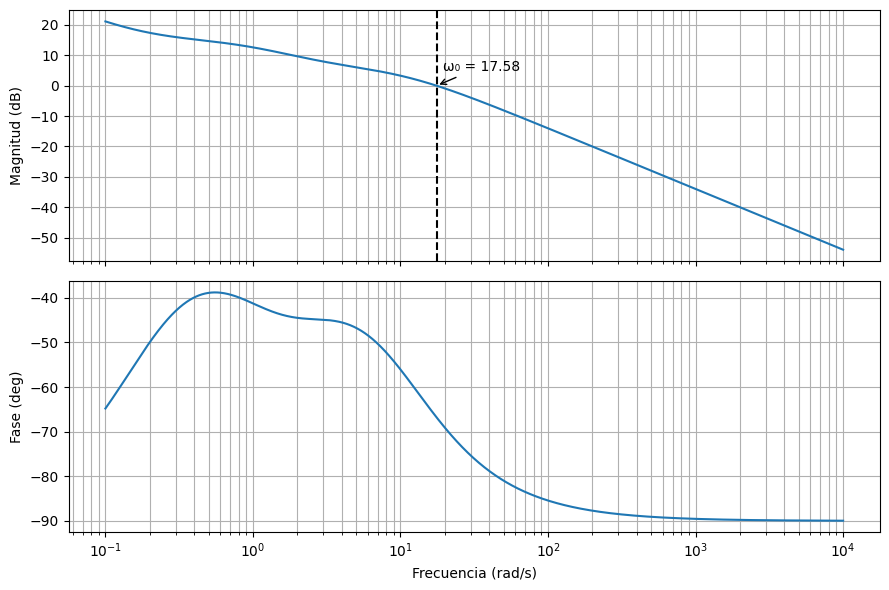

In [ ]:
# Bode para Gb(s)=20(s^2 + 3s + 0.5)/s(s+1)(s+10)

num = n.polymul([20], [1, 3, 0.5])
den = n.polymul([1, 0], n.polymul([1, 1], [1, 10]))
sys = tf(num, den)

gm, pm, wcg, wcp = margin(sys)
mg_db = 20 * n.log10(gm) if gm != float("inf") else float("inf")

w = n.logspace(-1, 4, 1200)  # frecuencia de 0.1 a 1000 rad/s

mag, phase, omega = bode(sys, w, plot=False)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

ax1.semilogx(omega, 20 * n.log10(mag))
ax1.set_ylabel("Magnitud (dB)")
ax1.grid(which='both')
if not n.isnan(wcp):
    ax1.axvline(wcp, color='k', linestyle='--')
    ax1.annotate(f'ω₀ = {wcp:.2f}', xy=(wcp, 0), xytext=(wcp*1.1, 5),
                 arrowprops=dict(arrowstyle='->'))

ax2.semilogx(omega, n.degrees(phase))
ax2.set_ylabel("Fase (deg)")
ax2.set_xlabel("Frecuencia (rad/s)")
ax2.grid(which='both')
if not n.isnan(wcg):
    ph = n.interp(wcg, omega, n.degrees(phase))
    ax2.axvline(wcg, color='k', linestyle='--')
    ax2.annotate(f'ω₁ = {wcg:.2f}', xy=(wcg, ph), xytext=(wcg*1.1, ph + 15),
                 arrowprops=dict(arrowstyle='->'))

print("\n--- Sistema (b) ---")
print(sys)
print(f"Margen de ganancia: {mg_db:.2f} dB")
print(f"Margen de fase: {pm:.2f}°")
print("✅ Estable" if mg_db > 0 and pm > 0 else "❌ Inestable")
plt.tight_layout()
plt.show()


# Conclusión
Sistema estable con buen margen de fase
La ganancia en la frecuencia crítica es 0 dB, pero la fase aún está lejos de −180°, por lo que el sistema tiene un buen margen de fase y es robustamente estable.

# **SEGUNDO PUNTO No.c**

/usr/local/lib/python3.11/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(



--- Sistema (c) ---
<TransferFunction>: sys[10]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


10 s^2 + 70 s + 100
-------------------
s^3 + 9 s^2 + 18 s

Margen de ganancia: inf dB
Margen de fase: 100.32°
✅ Estable


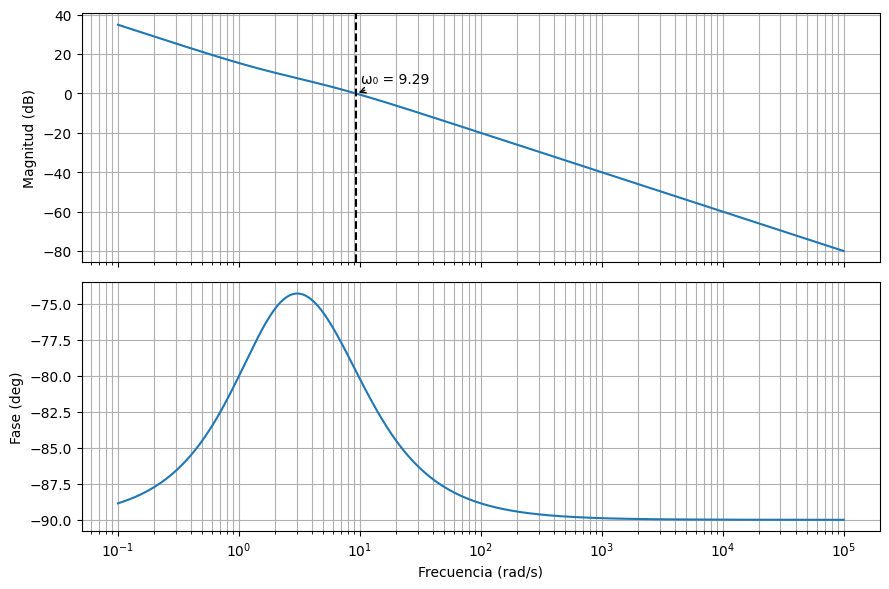

In [ ]:
# Bode para Gc(s)=10(s+2)(s+5)/s(s+3)(s+6)
num = n.polymul([10], n.polymul([1, 2], [1, 5]))
den = n.polymul([1, 0], n.polymul([1, 3], [1, 6]))
sys = tf(num, den)

gm, pm, wcg, wcp = margin(sys)
mg_db = 20 * n.log10(gm) if gm != float("inf") else float("inf")

w = n.logspace(-1, 5, 1200)  # frecuencia de 0.1 a 1000 rad/s

mag, phase, omega = bode(sys, w, plot=False)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

ax1.semilogx(omega, 20 * n.log10(mag))
ax1.set_ylabel("Magnitud (dB)")
ax1.grid(which='both')
if not n.isnan(wcp):
    ax1.axvline(wcp, color='k', linestyle='--')
    ax1.annotate(f'ω₀ = {wcp:.2f}', xy=(wcp, 0), xytext=(wcp*1.1, 5),
                 arrowprops=dict(arrowstyle='->'))

ax2.semilogx(omega, n.degrees(phase))
ax2.set_ylabel("Fase (deg)")
ax2.set_xlabel("Frecuencia (rad/s)")
ax2.grid(which='both')
if not n.isnan(wcg):
    ph = n.interp(wcg, omega, n.degrees(phase))
    ax2.axvline(wcg, color='k', linestyle='--')
    ax2.annotate(f'ω₁ = {wcg:.2f}', xy=(wcg, ph), xytext=(wcg*1.1, ph + 15),
                 arrowprops=dict(arrowstyle='->'))

print("\n--- Sistema (c) ---")
print(sys)
print(f"Margen de ganancia: {mg_db:.2f} dB")
print(f"Margen de fase: {pm:.2f}°")
print("✅ Estable" if mg_db > 0 and pm > 0 else "❌ Inestable")
plt.tight_layout()
plt.show()


# Conclusión
Sistema estable
El sistema cruza la ganancia en una frecuencia donde la fase sigue siendo alta (muy lejos de −180°). Tiene un margen de fase amplio ⇒ muy buena estabilidad.